## IMDB Datasets Playground

Exploring two of the six IMDB datasets: title.basics.csv and title.ratings.csv which, combined, can provide insights into IMDB's rating of movies. No box office/gross numbers are provided in the IMDB data but we'll assume that higher rated films are "better" films.


title.basics.csv has columns:

"tconst", "primary_title", "original_title", "start_year", "runtime_minutes", "genres"


title.ratings.csv has columns:

"tconst", "averagerating", "numvotes"

NOTES:
Records in these dataset can be joined on tconst.

In [50]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [55]:
imdb_titles_df = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
imdb_titles_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


Check for duplicates in the data

In [56]:
imdb_titles_dups = imdb_titles_df[imdb_titles_df.duplicated()]
print(len(imdb_titles_dups))

0


In [75]:
imdb_titles_tscont_dups = imdb_titles_df[imdb_titles_df.duplicated(['tconst'])]
print(len(imdb_titles_tscont_dups))

0


In [76]:
print(imdb_titles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [77]:
type(imdb_titles_df.iloc[:, 5][1]) #genres data type -- a comma-delimited string

str

title.basics.csv has 146,144 records

140,736 of 145,144 records have NaN for genres.  

The genres col is a comma-delimited string and I might flatten the data on genre.  

In [78]:
imdb_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


Check for duplicates in the data

In [79]:
imdb_ratings_dups = imdb_ratings_df[imdb_ratings_df.duplicated()]
print(len(imdb_ratings_dups))

0


In [80]:
imdb_ratings_tscont_dups = imdb_ratings_df[imdb_ratings_df.duplicated(['tconst'])]
print(len(imdb_ratings_tscont_dups))

0


In [81]:
print(imdb_ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


title.ratings.csv has 73,856 records. 

There are no NaNs. 

The averagerating and num votes are numeric values. 

Consider assiging some weight to numvotes.

Combining the two data frames on the tconst column means that 73,856 joined/merged records will be available after an inner join. 

In [82]:
imdb_rated_titles_df = pd.merge(imdb_titles_df, imdb_ratings_df)
imdb_rated_titles_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


In [83]:
print(imdb_rated_titles_df.info())
print(imdb_rated_titles_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB
None
       start_year  runtime_minutes  averagerating     numvotes
count   73,856.00        66,236.00      73,856.00    73,856.00
mean     2,014.28            94.65           6.33     3,523.66
std          2.61           208.57           1.47    30,294.02
min      2,010.00             3.00           1.00         5.00
25%      2,012.00            81.00           5.50 

There are multiple generes included in the genre column. Let's split them out to better use them.

In [22]:
print(f'Average rating min: {imdb_rated_titles_df.averagerating.min()}')
print(f'Average rating max: {imdb_rated_titles_df.averagerating.max()}')
print(f'Average rating mean: {imdb_rated_titles_df.averagerating.mean()}')
print(f'Average rating median: {imdb_rated_titles_df.averagerating.median()}')

Average rating min: 1.0
Average rating max: 10.0
Average rating mean: 6.332728552859619
Average rating median: 6.5


Text(0.5, 1.0, 'Average Rating by Frequency Counts for All Movies')

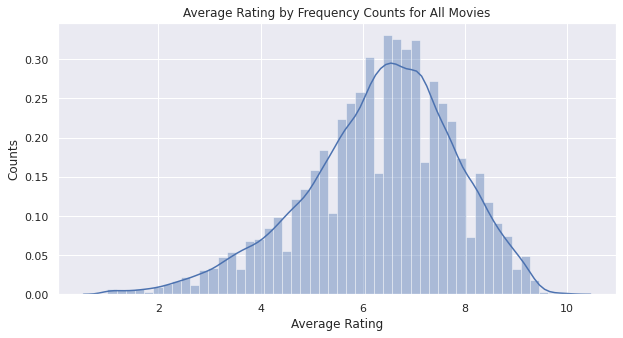

In [123]:
fig, ax = plt.subplots(figsize = (10, 5))

# Set the scale of the y-axes
sns.distplot(imdb_rated_titles_df['averagerating'])
plt.xlabel('Average Rating')
plt.ylabel('Counts')
plt.title('Average Rating by Frequency Counts for All Movies')

Text(0.5, 1.0, 'Average Rating by Frequency Counts for All Movies')

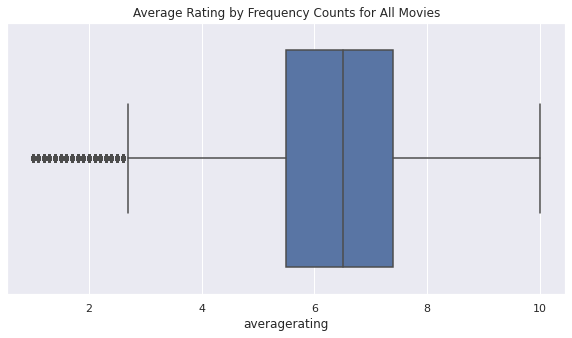

In [121]:
sns.set() # make it even prettier
plt.figure(figsize = (10, 5))
sns.boxplot(data = imdb_rated_titles_df, x = 'averagerating')
plt.title('Average Rating by Frequency Counts for All Movies')

In [11]:
print(f'# votes min: {imdb_rated_titles_df.numvotes.min()}')
print(f'# votes max: {imdb_rated_titles_df.numvotes.max()}')
print(f'# votes mean: {imdb_rated_titles_df.numvotes.mean()}')
print(f'# votes mean rounded: {imdb_rated_titles_df.numvotes.mean().round(2)}')
print(f'# votes median: {imdb_rated_titles_df.numvotes.median()}')

# votes min: 5
# votes max: 1841066
# votes mean: 3523.6621669194105
# votes mean rounded: 3523.66
# votes median: 49.0


Text(0.5, 1.0, 'Number of Votes by Frequency Counts for All Movies')

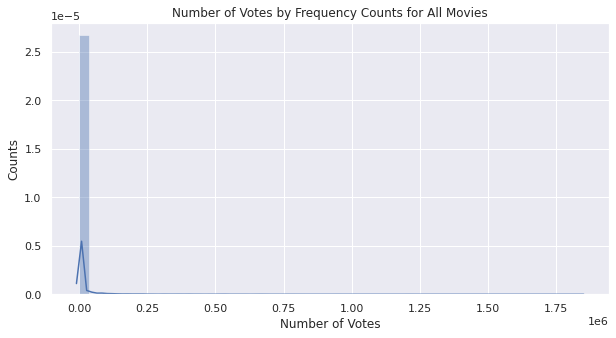

In [128]:
fig, ax = plt.subplots(figsize = (10, 5))

# Set the scale of the y-axes
sns.distplot(imdb_rated_titles_df['numvotes'])
plt.xlabel('Number of Votes')
plt.ylabel('Counts')

plt.title('Number of Votes by Frequency Counts for All Movies')

<AxesSubplot:xlabel='numvotes'>

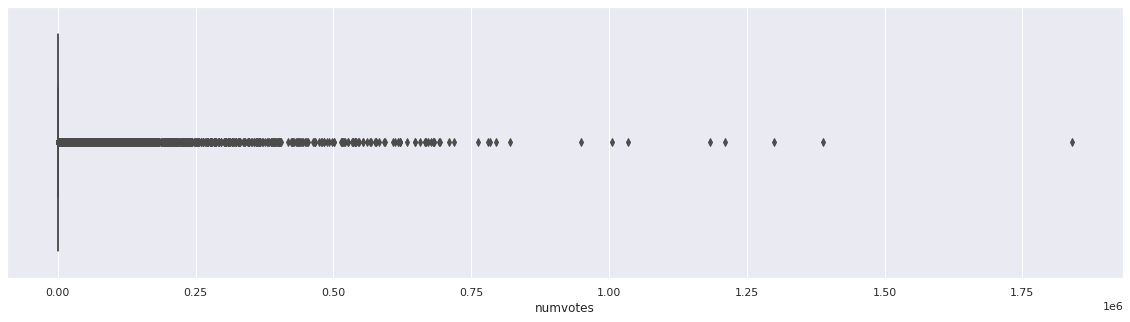

In [119]:
sns.set() # make it even prettier
plt.figure(figsize = (20, 5))
sns.boxplot(data = imdb_rated_titles_df, x = 'numvotes')

There exists a __broad__ range of numvotes. How should we handle this. A movie could be well rated but have a very small number of votes (i.e., well rated but not popular.)

According to the IMDB website, when they rank the top 250 movies "a movie must receive ratings from at least 25000 users"  https://www.imdb.com/chart/top

Also according to the IMDB website, they calculate the weighted rating for the Top 250 movies using the forumula:

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

Where:

R = average for the movie (mean) = (rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed in the Top Rated list (currently 25,000)

C = the mean vote across the whole report (confusing wording...means the mean of all movie ratings for entire, un-thresholded dataset)

While IMDB only includes theatric features, we will consider all entries in the dataset that have >=25,000 numvotes.

https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?ref_=helpms_helpart_inline#weighted



In [88]:
thres_numvotes_df = imdb_rated_titles_df[imdb_rated_titles_df['numvotes'] >=25000]
print(thres_numvotes_df.info())
print(thres_numvotes_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 41 to 73304
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1623 non-null   object 
 1   primary_title    1623 non-null   object 
 2   original_title   1623 non-null   object 
 3   start_year       1623 non-null   int64  
 4   runtime_minutes  1623 non-null   float64
 5   genres           1623 non-null   object 
 6   averagerating    1623 non-null   float64
 7   numvotes         1623 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 114.1+ KB
None
       start_year  runtime_minutes  averagerating     numvotes
count    1,623.00         1,623.00       1,623.00     1,623.00
mean     2,013.81           111.48           6.65   132,229.88
std          2.55            19.00           0.92   156,914.60
min      2,010.00            46.00           1.30    25,027.00
25%      2,012.00            98.00           6.2

Text(0.5, 1.0, 'Number of Votes by  Counts for Top Rated Movies')

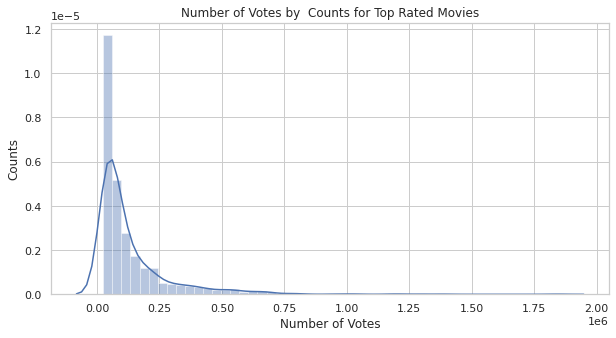

In [172]:
#now lets look at the distribution of numvotes now that we have applied IMDB's "top rated" numvote threashold.
fig, ax = plt.subplots(figsize = (10, 5))

# Set the scale of the y-axes
sns.distplot(thres_numvotes_df['numvotes'])
plt.xlabel('Number of Votes')
plt.ylabel('Counts')

plt.title('Number of Votes by  Counts for Top Rated Movies')

<AxesSubplot:xlabel='numvotes'>

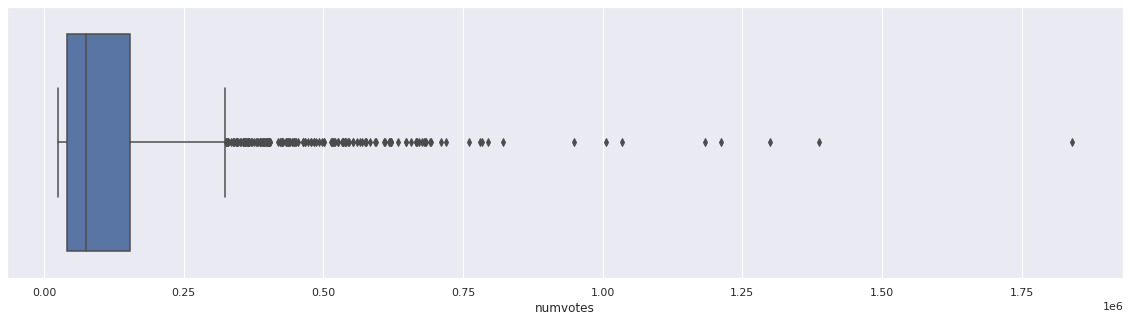

In [130]:
sns.set() # make it even prettier
plt.figure(figsize = (20, 5))
sns.boxplot(data = thres_numvotes_df, x = 'numvotes')

Let's apply IMDB's weighted rating formula to the Top Rated movies.

In [89]:
def calc_weighted_rating(avg_rating, num_votes, min_votes_required, mean_vote_whole_report):
    weighted_rating =  ((num_votes / (num_votes + min_votes_required)) * avg_rating) + ((min_votes_required/(num_votes + min_votes_required)) * mean_vote_whole_report)
    return weighted_rating

c_val = imdb_rated_titles_df.averagerating.mean().round(2)

#You need DataFrame.apply with axis=1 for processing by rows
thres_numvotes_df['weighted_rating'] = thres_numvotes_df.apply(lambda x: calc_weighted_rating(x['averagerating'], x['numvotes'], 25000, c_val), axis=1)
                                                                      

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
thres_numvotes_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,weighted_rating
41,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,37886,6.19
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,275300,7.22
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,105116,6.47
52,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338,6.97
54,tt0376136,The Rum Diary,The Rum Diary,2011,119.00,"Comedy,Drama",6.20,94787,6.23


In [133]:
print(thres_numvotes_df.describe())

       start_year  runtime_minutes  averagerating     numvotes  \
count    1,623.00         1,623.00       1,623.00     1,623.00   
mean     2,013.81           111.48           6.65   132,229.88   
std          2.55            19.00           0.92   156,914.60   
min      2,010.00            46.00           1.30    25,027.00   
25%      2,012.00            98.00           6.20    41,215.00   
50%      2,014.00           108.00           6.70    74,978.00   
75%      2,016.00           121.00           7.30   154,311.50   
max      2,019.00           321.00           9.30 1,841,066.00   

       weighted_rating  
count         1,623.00  
mean              6.60  
std               0.69  
min               2.78  
25%               6.21  
50%               6.58  
75%               7.03  
max               8.77  


Text(0.5, 1.0, 'Weighted Rating by Counts for Popular Movies')

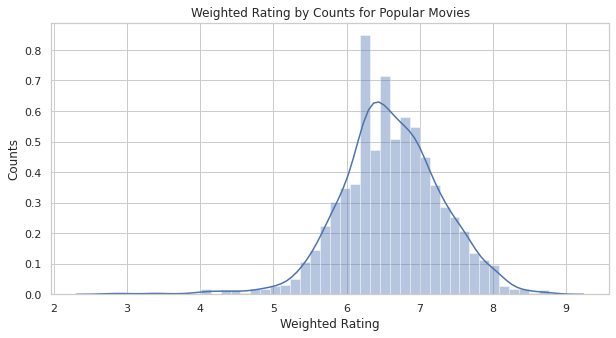

In [173]:
# Initialize figure and ax
fig, ax = plt.subplots(figsize = (10, 5))

# Set the scale of the y-axes
#ax.set(yscale='log')
sns.distplot(thres_numvotes_df['weighted_rating'])
plt.xlabel('Weighted Rating')
plt.ylabel('Counts')
plt.title('Weighted Rating by Counts for Popular Movies')

<AxesSubplot:xlabel='weighted_rating'>

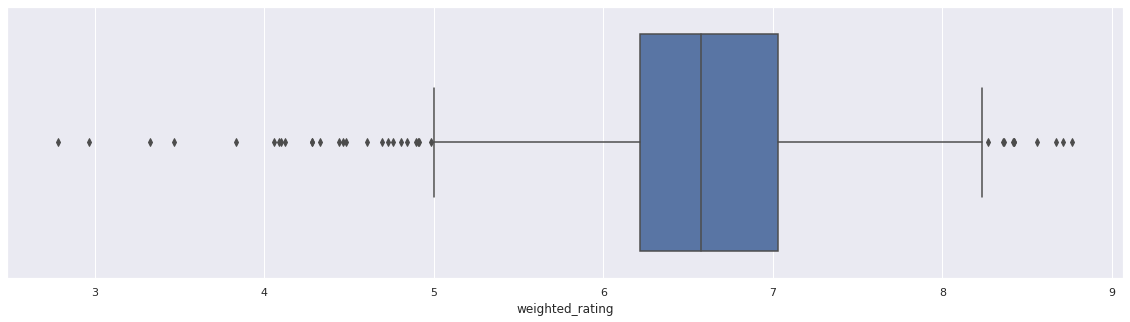

In [174]:
sns.set() # make it even prettier
plt.figure(figsize = (20, 5))
sns.boxplot(data = thres_numvotes_df, x = 'weighted_rating')

Let's merge in the data from Box Office Mojo that includes both domestic and foreign gross box-office revenue. Merging the two dataframes on title (IMDB's primary_title and BOM's title). We are only bringing in the BOM records thave have domestic and foreign gross.

In [134]:
bom_wwgross_df = pd.read_csv('./cleanedData/bom.worldwide_gross.csv')
bom_wwgross_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010,"960,300,000.00"
3,Inception,WB,"292,600,000.00","535,700,000.00",2010,"828,300,000.00"
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010,"752,600,000.00"


In [140]:
print(bom_wwgross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2009 non-null   object 
 1   studio           2009 non-null   object 
 2   domestic_gross   2009 non-null   float64
 3   foreign_gross    2009 non-null   float64
 4   year             2009 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.3+ KB
None


In [143]:
# performing an inner join on the movie title columns of the two dataframes 
# rename the BOM title to primary_title to make the join simpler
bom_wwgross_df.rename(columns={"title": "primary_title"}, inplace=True)
print(bom_wwgross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    2009 non-null   object 
 1   studio           2009 non-null   object 
 2   domestic_gross   2009 non-null   float64
 3   foreign_gross    2009 non-null   float64
 4   year             2009 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.3+ KB
None


In [145]:
# performing an inner join on the movie title columns of the two dataframes 
top_with_gross_df = pd.merge(thres_numvotes_df, bom_wwgross_df, on='primary_title')
top_with_gross_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,weighted_rating,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,37886,6.19,IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,275300,7.22,Fox,"58,200,000.00","129,900,000.00",2013,"188,100,000.00"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,105116,6.47,Uni.,"26,300,000.00","26,900,000.00",2014,"53,200,000.00"
3,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338,6.97,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.00,"Comedy,Drama",6.20,94787,6.23,FD,"13,100,000.00","10,800,000.00",2011,"23,900,000.00"


In [146]:
top_with_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1012
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1013 non-null   object 
 1   primary_title    1013 non-null   object 
 2   original_title   1013 non-null   object 
 3   start_year       1013 non-null   int64  
 4   runtime_minutes  1013 non-null   float64
 5   genres           1013 non-null   object 
 6   averagerating    1013 non-null   float64
 7   numvotes         1013 non-null   int64  
 8   weighted_rating  1013 non-null   float64
 9   studio           1013 non-null   object 
 10  domestic_gross   1013 non-null   float64
 11  foreign_gross    1013 non-null   float64
 12  year             1013 non-null   int64  
 13  worldwide_gross  1013 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 118.7+ KB


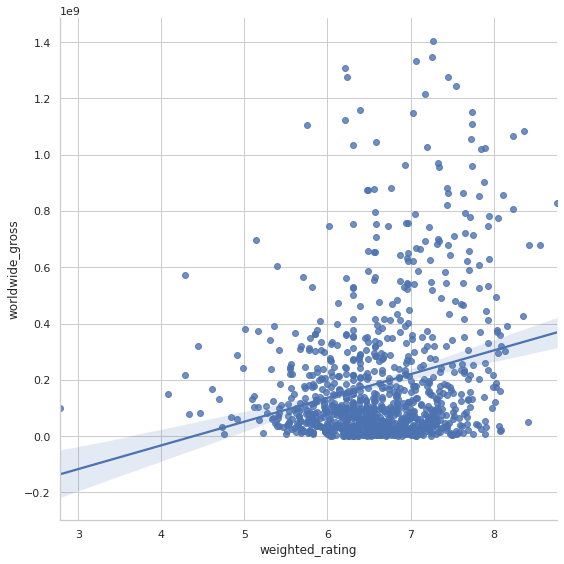

In [181]:
sns.set_style('whitegrid') 
sns.lmplot(x ='weighted_rating', y ='worldwide_gross',  data = top_with_gross_df, height=8, aspect=1) 

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


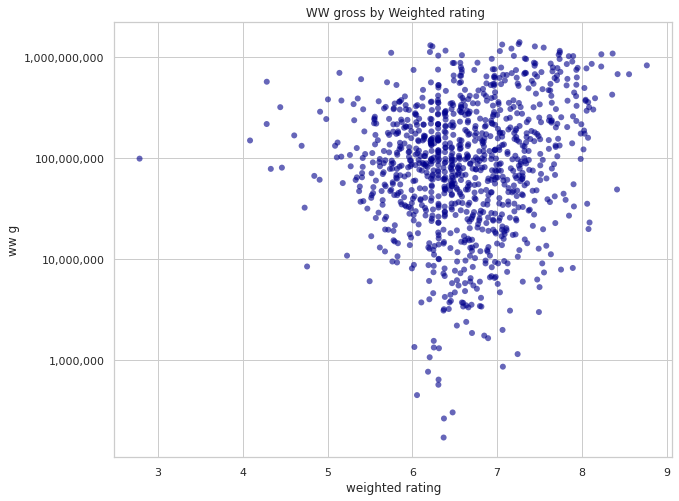

In [151]:
from matplotlib.ticker import StrMethodFormatter

fig = plt.figure(figsize=(10,8))
ax = plt.gca()
ax.scatter(top_with_gross_df['weighted_rating'], top_with_gross_df['worldwide_gross'], c='darkblue', edgecolors='none',  alpha=.60)
ax.set_yscale('log')
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title(' WW gross by Weighted rating')
plt.ylabel('ww g')
plt.xlabel('weighted rating')
plt.show()

In [170]:
print(np.corrcoef(x=top_with_gross_df['weighted_rating'], y=top_with_gross_df['worldwide_gross']))


[[1.        0.2450975]
 [0.2450975 1.       ]]


__CONCLUSIONS AND RECOMMENDATIONS__  no stronge relationship in this data analysis

In [190]:
top100_by_wwgross_df = top_with_gross_df.nlargest(100, 'worldwide_gross')
top100_by_wwgross_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,weighted_rating,studio,domestic_gross,foreign_gross,year,worldwide_gross
737,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,665594,7.26,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
556,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148,7.26,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
755,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,462903,7.06,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
954,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125,6.21,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
254,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311,6.24,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"


In [192]:
top100_by_wwgross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 737 to 946
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           100 non-null    object 
 1   primary_title    100 non-null    object 
 2   original_title   100 non-null    object 
 3   start_year       100 non-null    int64  
 4   runtime_minutes  100 non-null    float64
 5   genres           100 non-null    object 
 6   averagerating    100 non-null    float64
 7   numvotes         100 non-null    int64  
 8   weighted_rating  100 non-null    float64
 9   studio           100 non-null    object 
 10  domestic_gross   100 non-null    float64
 11  foreign_gross    100 non-null    float64
 12  year             100 non-null    int64  
 13  worldwide_gross  100 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 11.7+ KB


Text(0, 0.5, 'Genres')

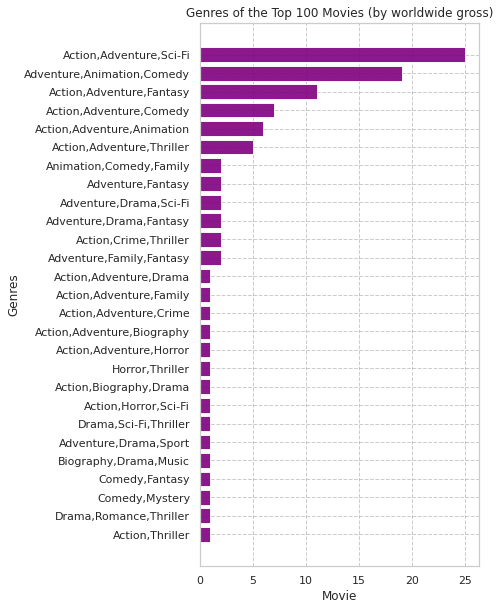

In [204]:
top100_by_wwgross_binned_by_genres = top100_by_wwgross_df.groupby('genres')['primary_title'].count()
top100_by_wwgross_binned_by_genres.sort_values( inplace=True)

#viz it 
fig = plt.figure(figsize = (5,10))
plt.barh(top100_by_wwgross_binned_by_genres.index, top100_by_wwgross_binned_by_genres, color = 'purple', alpha = 0.90)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Genres of the Top 100 Movies (by worldwide gross)')
plt.xlabel('Movie')
plt.ylabel('Genres')

In [209]:
top_with_gross_df['year'].unique()

array([2012, 2013, 2014, 2015, 2011, 2010, 2017, 2016, 2018])

In [210]:
#Years 2010-2018 - these are the top grossing movings over a span of 9 years.
# it would be interesting to do a deeper genre analysis (split them up ). 
# it would also be interesting to see genres of the top recent movies (last 5 year/last 3 year)

__CONCLUSIONS AND RECOMMENDATIONS__

MORE DISTRIBUTIONS

<AxesSubplot:xlabel='weighted_rating'>

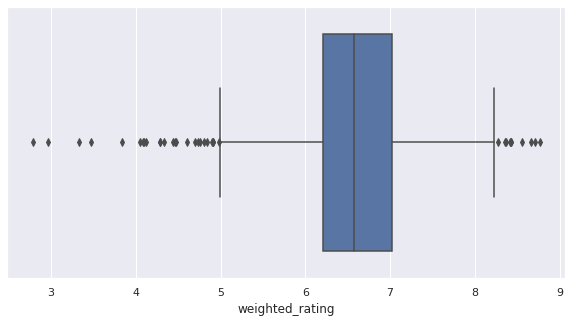

In [118]:
sns.set() # make it even prettier later with .set()
plt.figure(figsize = (10, 5))
sns.boxplot(data = thres_numvotes_df, x = 'weighted_rating')

__RANDOM STUFF__

...bailing on doing  advanced genre analysis due to lack of time...
__PUT THIS IN FUTURE WORK__

In [99]:
# this will get them into a list
genres_list = imdb_rated_titles_df['genres'].str.lower().str.split(",").to_list()

# using dummy varaibles for genres
# this is converting all of the lists into a Series so pandas can hash through it
# so you iterate or index through a list
# you has through a dictionary

# we're converting our column of lists to something that is hashable
imdb_genres_df = pd.get_dummies(imdb_rated_titles_df['genres'].str.split(",").apply(pd.Series).stack(),
               prefix='genre',
               prefix_sep="_").sum(level=0)
# this does not include nulls

   genre_Action  genre_Adult  genre_Adventure  genre_Animation  \
0             1            0                0                0   
1             0            0                0                0   
2             0            0                0                0   
3             0            0                0                0   
4             0            0                0                0   

   genre_Biography  genre_Comedy  genre_Crime  genre_Documentary  genre_Drama  \
0                0             0            1                  0            1   
1                1             0            0                  0            1   
2                0             0            0                  0            1   
3                0             1            0                  0            1   
4                0             1            0                  0            1   

   genre_Family  ...  genre_Mystery  genre_News  genre_Reality-TV  \
0             0  ...              0           0

In [104]:
imdb_genres_df.head()

,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,...,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Thriller,genre_War,genre_Western
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
imdb_rated_titles_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


In [109]:
# merge the newly created genre dummy var dataframe with the rated movie titles dataframe
# the index vals match up so merge on index of both the dataframes
#mergedDf = empDfObj.merge(salaryDfObj, left_index=True, right_index=True)
imdb_rated_titles_genre_dummy_df = imdb_rated_titles_df.merge(imdb_genres_df, left_index=True, right_index=True)
imdb_rated_titles_genre_dummy_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_Action,genre_Adult,...,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Thriller,genre_War,genre_Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
print(imdb_rated_titles_genre_dummy_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             73052 non-null  object 
 1   primary_title      73052 non-null  object 
 2   original_title     73052 non-null  object 
 3   start_year         73052 non-null  int64  
 4   runtime_minutes    65720 non-null  float64
 5   genres             73052 non-null  object 
 6   averagerating      73052 non-null  float64
 7   numvotes           73052 non-null  int64  
 8   genre_Action       73052 non-null  uint8  
 9   genre_Adult        73052 non-null  uint8  
 10  genre_Adventure    73052 non-null  uint8  
 11  genre_Animation    73052 non-null  uint8  
 12  genre_Biography    73052 non-null  uint8  
 13  genre_Comedy       73052 non-null  uint8  
 14  genre_Crime        73052 non-null  uint8  
 15  genre_Documentary  73052 non-null  uint8  
 16  genre_Drama        730